In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


**K Means on randomly generated dataset**

In [2]:
# setting up random seed
np.random.seed(0)
x,y=make_blobs(5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

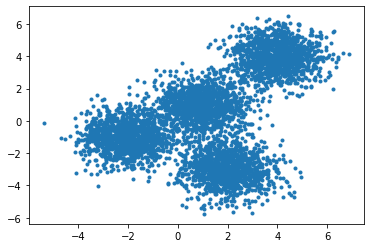

In [3]:
# scatter plot for randomly generated data
plt.scatter(x[:,0],x[:,1], marker='.')

In [4]:
# setting up KMeans
kmeans= KMeans(n_clusters=4, init='k-means++', n_init=12)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
labels=kmeans.labels_
labels

array([0, 2, 2, ..., 3, 0, 0], dtype=int32)

In [6]:
centers=kmeans.cluster_centers_
centers

array([[-2.03743147, -0.99782524],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822],
       [ 3.97334234,  3.98758687]])

**DATA VISUALIZATION**

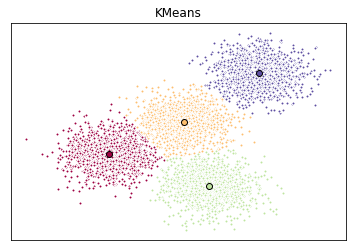

In [22]:
# initialise the specific dimensions
fig=plt.figure(figsize=(6,4))
#for giving colours
colors=plt.cm.Spectral(np.linspace(0,1,len(set(labels))))
# create a plot
ax=fig.add_subplot(1,1,1)
# to plot data points in the graph
for k,col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])),colors):
  #listing the values as true for those data points which are in same clusters otherwise false
  members=(labels==k)
  # define centroid for each clusters
  centroid=centers[k]
  #plot data points with colors
  ax.plot(x[members,0],x[members,1],'w', markerfacecolor=col, marker='.')
  # Plots the centroids with specified color, but with a darker outline
  ax.plot(centroid[0], centroid[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
# Title of the plot
ax.set_title('KMeans')
# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()